In [76]:
from datetime import datetime

import numpy as np
import pandas as pd
from numpy import array

from os import listdir
from os.path import isfile, join
import glob

import pickle

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
#import cmocean
##from mpl_toolkits.basemap import Basemap

from matplotlib import ticker
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as colors
import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm
from matplotlib.lines import Line2D
from cartopy.mpl.ticker import LongitudeFormatter


import metpy.calc as mpcalc
from metpy.units import units
import numpy as np
from scipy.ndimage import gaussian_filter
import xarray as xr
import scipy as _sp

import scipy.linalg as sc
import numpy.linalg as lin

In [77]:
import zapata.computation as zcom
import zapata.data as zdat
import zapata.lib as zlib
import zapata.mapping as zmap
import zapata.koopman as zkop

import cftime

In [78]:
ds_ssh = xr.open_dataset('SSH_regridded.nc',use_cftime=None).rename({'latitude': 'lat', 'longitude': 'lon'})  

In [79]:
ds_ssh

<xarray.Dataset>
Dimensions:       (time_counter: 684, lat: 721, lon: 1440)
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 1958-01-16 ... 2014-12-16
  * lat           (lat) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * lon           (lon) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
Data variables:
    sossheig      (time_counter, lat, lon) float64 ...
Attributes:
    Conventions:  CF-1.9
    NCO:          netCDF Operators version 4.9.2 (Homepage = http://nco.sf.ne...
    institution:  European Centre for Medium-Range Weather Forecasts (ECMWF) ...
    reference:    https://www.ecmwf.int/en/research/climate-reanalysis/ocean-...
    source:       ORAS5 - backward extension (ECMWF)
    title:        Monthly mean 2D Sea Surface fields

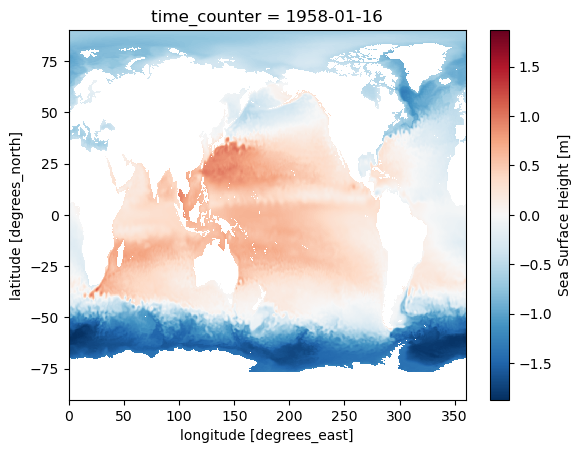

In [80]:
ds_ssh.isel(time_counter=0).sossheig.plot()

In [92]:
ds_ssh['lon']=np.arange(-180, 180, 0.25)

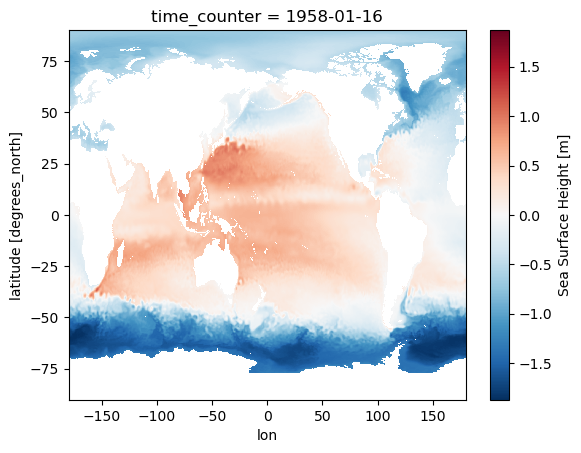

In [93]:
ds_ssh.isel(time_counter=0).sossheig.plot()

In [94]:
SST_data = xr.open_dataset('HadISST_sst.nc',use_cftime=None).drop_dims('nv').rename({'latitude': 'lat', 'longitude': 'lon'})  

Shifting from 0 to 180.0


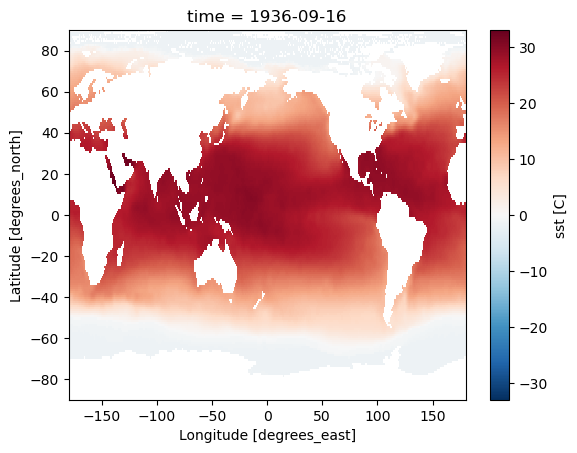

In [95]:
SST_data = zmap.adjust_data_centlon(SST_data.sst)

SST_data.data[abs(SST_data) > 100] = np.nan
SST_data.isel(time=800).plot()

In [96]:
SST_data

<xarray.DataArray 'sst' (time: 1828, lat: 180, lon: 360)>
array([[[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
...
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [-1.8,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[ nan, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1870-01-16T11:59:59.505615234 ... 2022-04-...
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      sst
    units:          C
    cell_methods:   time: lat: lon: mean

In [97]:
SSH_data = ds_ssh.interp_like(SST_data)

In [98]:
SSH_data

<xarray.Dataset>
Dimensions:       (time_counter: 684, lat: 180, lon: 360)
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 1958-01-16 ... 2014-12-16
  * lat           (lat) float32 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon           (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Data variables:
    sossheig      (time_counter, lat, lon) float64 -0.6599 -0.6602 ... nan nan
Attributes:
    Conventions:  CF-1.9
    NCO:          netCDF Operators version 4.9.2 (Homepage = http://nco.sf.ne...
    institution:  European Centre for Medium-Range Weather Forecasts (ECMWF) ...
    reference:    https://www.ecmwf.int/en/research/climate-reanalysis/ocean-...
    source:       ORAS5 - backward extension (ECMWF)
    title:        Monthly mean 2D Sea Surface fields

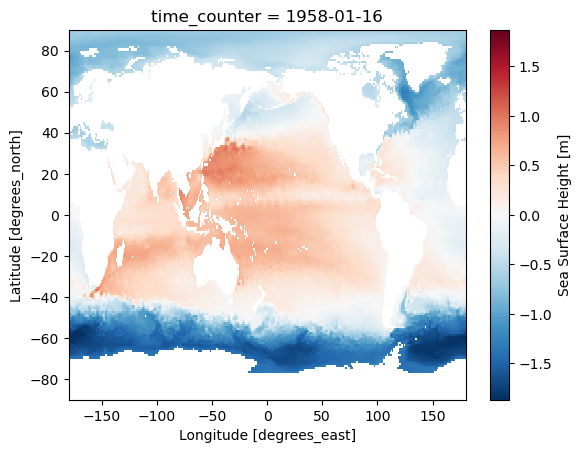

In [105]:
SSH_data.sossheig.isel(time_counter=0).plot()

In [103]:
SSH_data.to_netcdf("SSH_regridded_HadISST.nc")

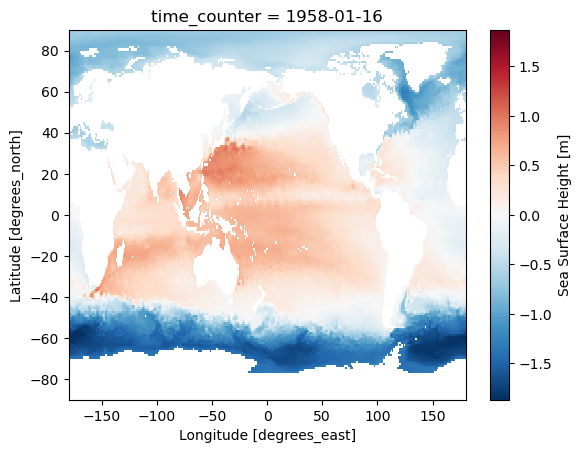

In [107]:
xr.open_dataset('SSH_regridded_HadISST.nc',use_cftime=None).sossheig.isel(time_counter=0).plot()